# AAL Sales Analysis

In [42]:
# #install dependencies
# !pip install pandas
# !pip install seaborn
# !pip install scipy
# !pip install scikit-learn

In [43]:
import pandas as pd

df = pd.read_csv('./AusApparelSales4Q2020.csv')
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


# 1. Data Wrangling

- a. Ensure that the data is clean and free from any missing or incorrect entries.
    - Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().
- b. Based on your knowledge of Data Analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).

In [44]:
# Inspecting the first few rows of the DataFrame
print(df.head())

# Displaying the last few rows of the DataFrame
print(df.tail())


         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500
             Date        Time State     Group  Unit  Sales
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500


In [45]:

# Providing information about the DataFrame, including data types and non-null counts
print(df.info())

# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, etc.
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None
              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000


This dataset includes observations from 2020-10-01 to 2020-12-30 corresponding to 4Q-2020.

### Inspect for missing/wrong values

In [46]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Checking for NaN values
# Get rows containing NaN values
rows_with_null = df[df.isnull().any(axis=1)]

print("Rows containing Null values:")
print(rows_with_null)

Missing Values per Column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
Rows containing Null values:
Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


In [47]:
# Checking for NaN values
# Get rows containing NaN values
rows_with_nan = df[df.isna().any(axis=1)]

print("Rows containing NaN values:")
print(rows_with_nan)

Rows containing NaN values:
Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


Remove duplicates

In [48]:
# Removing duplicate records
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


No duplicates found

## Standarize data formats

- c. Choose a suitable Data Wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)

In [49]:
# Cleaning data by standardizing formats
df['Date'] = pd.to_datetime(df['Date'])
# df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# Displaying the DataFrame after cleaning
print("DataFrame after cleaning data by standardizing formats:")
df.head()

DataFrame after cleaning data by standardizing formats:


,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


### Data Normalization

In [50]:
from sklearn.preprocessing import MinMaxScaler


# manual normalization
# df['NormSales'] = (df['Sales']-df['Sales'].min())/(df['Sales'].max()-df['Sales'].min())


# Scaling numeric features using min-max scaling
scaler = MinMaxScaler()
df[['norm_unit', 'norm_sales']] = scaler.fit_transform(df[['Unit', 'Sales']])
print(df)

           Date        Time State     Group  Unit  Sales  norm_unit  \
0    2020-10-01     Morning    WA      Kids     8  20000   0.095238   
1    2020-10-01     Morning    WA       Men     8  20000   0.095238   
2    2020-10-01     Morning    WA     Women     4  10000   0.031746   
3    2020-10-01     Morning    WA   Seniors    15  37500   0.206349   
4    2020-10-01   Afternoon    WA      Kids     3   7500   0.015873   
...         ...         ...   ...       ...   ...    ...        ...   
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000   0.190476   
7556 2020-12-30     Evening   TAS      Kids    15  37500   0.206349   
7557 2020-12-30     Evening   TAS       Men    15  37500   0.206349   
7558 2020-12-30     Evening   TAS     Women    11  27500   0.142857   
7559 2020-12-30     Evening   TAS   Seniors    13  32500   0.174603   

      norm_sales  
0       0.095238  
1       0.095238  
2       0.031746  
3       0.206349  
4       0.015873  
...          ...  
7555    0.1904

### Data augmentation

Create a new column for day of the week

In [51]:
# Convert 'Date' column to datetime and extract weekday name
df['WeekDay'] = pd.to_datetime(df['Date']).dt.strftime('%A')
# df['WeekDay'] = pd.to_datetime(df['Date']).dt.weekday

df['unit_sales'] = df['Unit']*df['Sales']

df.head()

,Date,Time,State,Group,Unit,Sales,norm_unit,norm_sales,WeekDay,unit_sales
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238,Thursday,160000
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238,Thursday,160000
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746,Thursday,40000
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349,Thursday,562500
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873,Thursday,22500


Get data insights

In [52]:
print(df.describe())

                                Date         Unit          Sales    norm_unit  \
count                           7560  7560.000000    7560.000000  7560.000000   
mean   2020-11-15 04:00:00.000000256    18.005423   45013.558201     0.254054   
min              2020-10-01 00:00:00     2.000000    5000.000000     0.000000   
25%              2020-10-23 00:00:00     8.000000   20000.000000     0.095238   
50%              2020-11-15 12:00:00    14.000000   35000.000000     0.190476   
75%              2020-12-08 00:00:00    26.000000   65000.000000     0.380952   
max              2020-12-30 00:00:00    65.000000  162500.000000     1.000000   
std                              NaN    12.901403   32253.506944     0.204784   

        norm_sales    unit_sales  
count  7560.000000  7.560000e+03  
mean      0.254054  1.226549e+06  
min       0.000000  1.000000e+04  
25%       0.095238  1.600000e+05  
50%       0.190476  4.900000e+05  
75%       0.380952  1.690000e+06  
max       1.000000  1.056

In [53]:
# Get correlation
df[['Unit', 'Sales']].corr()

,Unit,Sales
Unit,1.0,1.0
Sales,1.0,1.0


In [54]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns.describe()
# print(categorical_columns.head())
# # df[[categorical_columns]].value_counts()
# categorical_columns.value_counts()
# categorical_columns.unstack()


,Time,State,Group,WeekDay
count,7560,7560,7560,7560
unique,3,7,4,7
top,Morning,WA,Kids,Thursday
freq,2520,1080,1890,1092


In [55]:
df['State'].value_counts()

State
WA     1080
NT     1080
SA     1080
VIC    1080
QLD    1080
NSW    1080
TAS    1080
Name: count, dtype: int64

### we have same number of observations for each state which is good.

In [56]:
df['WeekDay'].value_counts()

WeekDay
Thursday     1092
Friday       1092
Sunday       1092
Monday       1092
Tuesday      1092
Wednesday    1092
Saturday     1008
Name: count, dtype: int64

# the data is a bit biased. We have only 1008 observations for Saturdays while other days have a count of 1092

We need to verify if this inequality is distributed equaly accoss all states for each day of the week.

- d. Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.

The groupby() function is used to cluster the data by state and weekday to easily recognize the observations aquired day of the week.

In [57]:
state_week = df.groupby(['State', 'WeekDay'])
print(state_week.size())


State  WeekDay  
NSW    Friday       156
       Monday       156
       Saturday     144
       Sunday       156
       Thursday     156
       Tuesday      156
       Wednesday    156
NT     Friday       156
       Monday       156
       Saturday     144
       Sunday       156
       Thursday     156
       Tuesday      156
       Wednesday    156
QLD    Friday       156
       Monday       156
       Saturday     144
       Sunday       156
       Thursday     156
       Tuesday      156
       Wednesday    156
SA     Friday       156
       Monday       156
       Saturday     144
       Sunday       156
       Thursday     156
       Tuesday      156
       Wednesday    156
TAS    Friday       156
       Monday       156
       Saturday     144
       Sunday       156
       Thursday     156
       Tuesday      156
       Wednesday    156
VIC    Friday       156
       Monday       156
       Saturday     144
       Sunday       156
       Thursday     156
       Tuesday      156

In [58]:
#This data is groupby, you need to unstack to make operations like a normal dataframe
state_week_df = state_week.size().unstack()
print(state_week_df)



WeekDay  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
State                                                                  
NSW         156     156       144     156       156      156        156
NT          156     156       144     156       156      156        156
QLD         156     156       144     156       156      156        156
SA          156     156       144     156       156      156        156
TAS         156     156       144     156       156      156        156
VIC         156     156       144     156       156      156        156
WA          156     156       144     156       156      156        156


## All states have 144 observations for Saturday, therefore the small bias on the data is expected to affect equally to all states.

# Data Cleaning

Possible ways to compensate for this bias...
1. Dropping all observations for day Saturday.
2. Drop 12 observations to each day to make all days equal to 144.
3. Add 12 observations for each day corresponding to the mean value of Unit and Sales for every state.

# 2. Data Analysis

- a. Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

In [59]:
# Descriptive statistics
descriptive_stats = df.describe()
# print(descriptive_stats)

# Calculate mode for each column
modes = df.mode().iloc[0]

# Add mode row to descriptive statistics
descriptive_stats.loc['mode'] = modes

# Print descriptive statistics
print("Descriptive statistics:")
print(descriptive_stats)

Descriptive statistics:
                                Date         Unit          Sales    norm_unit  \
count                           7560  7560.000000    7560.000000  7560.000000   
mean   2020-11-15 04:00:00.000000256    18.005423   45013.558201     0.254054   
min              2020-10-01 00:00:00     2.000000    5000.000000     0.000000   
25%              2020-10-23 00:00:00     8.000000   20000.000000     0.095238   
50%              2020-11-15 12:00:00    14.000000   35000.000000     0.190476   
75%              2020-12-08 00:00:00    26.000000   65000.000000     0.380952   
max              2020-12-30 00:00:00    65.000000  162500.000000     1.000000   
std                              NaN    12.901403   32253.506944     0.204784   
mode             2020-10-01 00:00:00     9.000000   22500.000000     0.111111   

        norm_sales    unit_sales  
count  7560.000000  7.560000e+03  
mean      0.254054  1.226549e+06  
min       0.000000  1.000000e+04  
25%       0.095238  1.600

In [60]:
print('Descriptive Statistical analysis for Sales')
print('Mean:',df['Sales'].mean())
print('Median:',df['Sales'].median())
print('Mode:',df['Sales'].mode())
print('Standard Deviation:',df['Sales'].std())

print('Descriptive Statistical analysis for Unit')
print('Mean:',df['Unit'].mean())
print('Median:',df['Unit'].median())
print('Mode:',df['Unit'].mode())
print('Standard Deviation:',df['Unit'].std())

Descriptive Statistical analysis for Sales
Mean: 45013.5582010582
Median: 35000.0
Mode: 0    22500
Name: Sales, dtype: int64
Standard Deviation: 32253.506943966073
Descriptive Statistical analysis for Unit
Mean: 18.00542328042328
Median: 14.0
Mode: 0    9
Name: Unit, dtype: int64
Standard Deviation: 12.90140277758643


- b. Identify the group with the highest sales and the group with the lowest sales based on the data provided.

In [61]:
# Grouping by 'Group' and calculating total sales for each category
# group_sales = df.groupby('Group')['Sales'].sum().reset_index()
# reset_index() is used to keep the name of the columns in place

# Calculate total sales for each group
group_sales = df.groupby('Group')['Sales'].sum()

print("\nGrouped DataFrame with total revenue:")
print(group_sales)


# Identify group with highest sales
highest_sales_group = group_sales.idxmax()
highest_sales_amount = group_sales.max()

# Identify group with lowest sales
lowest_sales_group = group_sales.idxmin()
lowest_sales_amount = group_sales.min()

print("Group with highest sales:")
print(f"Group: {highest_sales_group}, Sales: {highest_sales_amount}")

print("\nGroup with lowest sales:")
print(f"Group: {lowest_sales_group}, Sales: {lowest_sales_amount}")



Grouped DataFrame with total revenue:
Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64
Group with highest sales:
Group:  Men, Sales: 85750000

Group with lowest sales:
Group:  Seniors, Sales: 84037500


The group with highest sales is Men while the Seniors are the lowest.

- c. Identify the group within the highest and lowest sales based on the data provided.

To identify the group with the highest and lowest sales based on the data, without aggregating by group, I find the row with the maximum and minimum sales in the DataFrame. 

In [62]:

# Identify group with highest sales
highest_sales_group = df.loc[df['Sales'].idxmax(), 'Group']
highest_sales_amount = df['Sales'].max()

# Identify group with lowest sales
lowest_sales_group = df.loc[df['Sales'].idxmin(), 'Group']
lowest_sales_amount = df['Sales'].min()

print("Group with highest sales:")
print(f"Group: {highest_sales_group}, Sales: {highest_sales_amount}")

print("\nGroup with lowest sales:")
print(f"Group: {lowest_sales_group}, Sales: {lowest_sales_amount}")

Group with highest sales:
Group:  Seniors, Sales: 162500

Group with lowest sales:
Group:  Men, Sales: 5000


- d. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.
(Use suitable libraries such as NumPy, Pandas, SciPy, etc. for performing the analysis.)

In [63]:
# sales_df = df[['Date', 'Sales']]
sales_df = df[['Date', 'Sales']].copy()
sales_df['Sales'] = sales_df['Sales']/1_000_000

# # Weekly report
# weekly_report = sales_df.resample('W-Mon', on='Date').sum()

# # Monthly report
# monthly_report = sales_df.resample('ME', on='Date').sum()

# # Quarterly report
# quarterly_report = sales_df.resample('QE', on='Date').sum()

# Weekly report
weekly_report = sales_df.groupby(pd.Grouper(key='Date', freq='W-Mon')).sum()

# Monthly report
monthly_report = sales_df.groupby(pd.Grouper(key='Date', freq='ME')).sum()

# Quarterly report
quarterly_report = sales_df.groupby(pd.Grouper(key='Date', freq='QE')).sum()

# 3. Data visualization

- a. Use suitable data visualization libraries to construct a dashboard for the Head of Sales and Marketing (S&M). The dashboard should encompass key parameters:
    - State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors).
    - Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.
    - Time-of-the-Day Analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

- b. Ensure the visualization is clear and accessible for effective decision-making by the Head of S&M.
The dashboard must contain daily, weekly, monthly, and quarterly charts.
 (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)

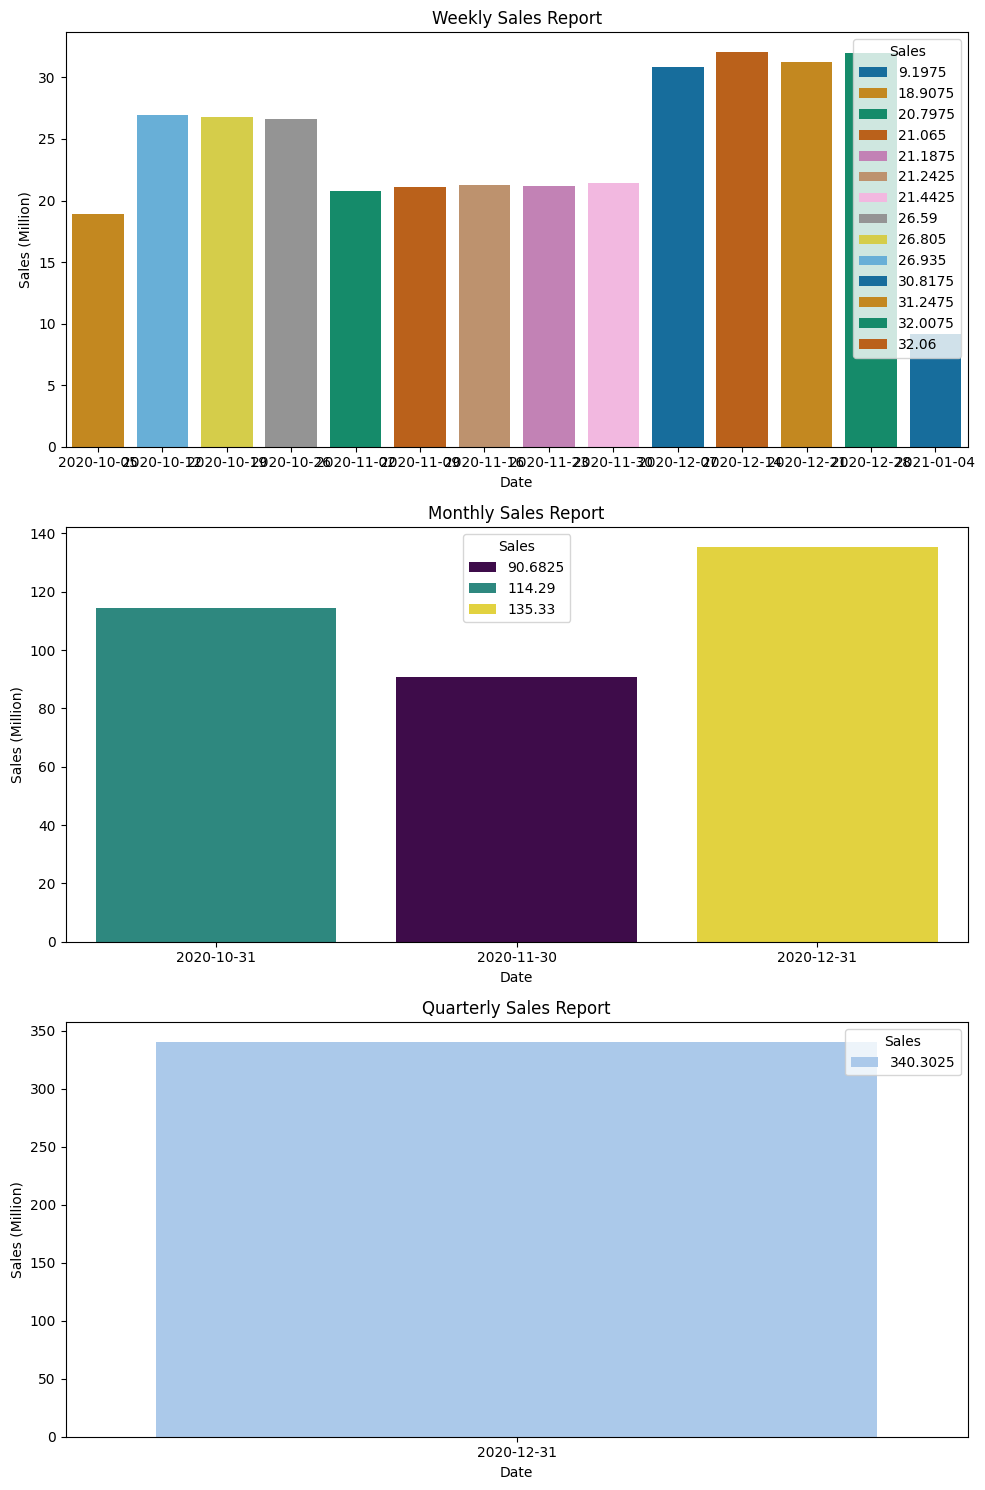

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots using Seaborn
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Weekly Sales Report
sns.barplot(data=weekly_report, x='Date', y='Sales', ax=axes[0], hue='Sales', palette='colorblind', legend=True)
axes[0].set_title('Weekly Sales Report')
axes[0].set_ylabel('Sales (Million)')

# Monthly Sales Report
sns.barplot(data=monthly_report, x='Date', y='Sales', ax=axes[1], hue='Sales', palette='viridis', legend=True)
axes[1].set_title('Monthly Sales Report')
axes[1].set_ylabel('Sales (Million)')

# Quarterly Sales Report
sns.barplot(data=quarterly_report, x='Date', y='Sales',  ax=axes[2], hue='Sales', palette='pastel', legend=True)
axes[2].set_title('Quarterly Sales Report')
axes[2].set_ylabel('Sales (Million)')

plt.tight_layout()
plt.show()

In [65]:
# See the minimum values as grouped by State and DayWeek
state_week.min()

Date        Time  Group  Unit  Sales  norm_unit  \
State WeekDay                                                           
NSW   Friday    2020-10-02   Afternoon   Kids    12  30000   0.158730   
      Monday    2020-10-05   Afternoon   Kids    12  30000   0.158730   
      Saturday  2020-10-03   Afternoon   Kids    12  30000   0.158730   
      Sunday    2020-10-04   Afternoon   Kids    12  30000   0.158730   
      Thursday  2020-10-01   Afternoon   Kids    12  30000   0.158730   
      Tuesday   2020-10-06   Afternoon   Kids    12  30000   0.158730   
      Wednesday 2020-10-07   Afternoon   Kids    12  30000   0.158730   
NT    Friday    2020-10-02   Afternoon   Kids     2   5000   0.000000   
      Monday    2020-10-05   Afternoon   Kids     2   5000   0.000000   
      Saturday  2020-10-03   Afternoon   Kids     2   5000   0.000000   
      Sunday    2020-10-04   Afternoon   Kids     2   5000   0.000000   
      Thursday  2020-10-01   Afternoon   Kids     2   5000   0.000000   
      Tuesday   2020-10-06   Afternoon   Kids     2   5000   0.000000   
      Wednesday 2020-10-07   Afternoon   Kids     2   5000   0.000000   
QLD   Friday    2020-10-02   Afternoon   Kids     3   7500   0.015873   
      Monday    2020-10-05   Afternoon   Kids     3   7500   0.015873   
      Saturday  2020-10-03   Afternoon   Kids     4  10000   0.031746   
      Sunday    2020-10-04   Afternoon   Kids     3   7500   0.015873   
      Thursday  2020-10-01   Afternoon   Kids     3   7500   0.015873   
      Tuesday   2020-10-06   Afternoon   Kids     3   7500   0.015873   
      Wednesday 2020-10-07   Afternoon   Kids     3   7500   0.015873   
SA    Friday    2020-10-02   Afternoon   Kids    10  25000   0.126984   
      Monday    2020-10-05   Afternoon   Kids    10  25000   0.126984   
      Saturday  2020-10-03   Afternoon   Kids    10  25000   0.126984   
      Sunday    2020-10-04   Afternoon   Kids    10  25000   0.126984   
      Thursday  2020-10-01   Afternoon   Kids    10  25000   0.126984   
      Tuesday   2020-10-06   Afternoon   Kids    10  25000   0.126984   
      Wednesday 2020-10-07   Afternoon   Kids    10  25000   0.126984   
TAS   Friday    2020-10-02   Afternoon   Kids     2   5000   0.000000   
      Monday    2020-10-05   Afternoon   Kids     2   5000   0.000000   
      Saturday  2020-10-03   Afternoon   Kids     2   5000   0.000000   
      Sunday    2020-10-04   Afternoon   Kids     2   5000   0.000000   
      Thursday  2020-10-01   Afternoon   Kids     2   5000   0.000000   
      Tuesday   2020-10-06   Afternoon   Kids     2   5000   0.000000   
      Wednesday 2020-10-07   Afternoon   Kids     2   5000   0.000000   
VIC   Friday    2020-10-02   Afternoon   Kids    20  50000   0.285714   
      Monday    2020-10-05   Afternoon   Kids    20  50000   0.285714   
      Saturday  2020-10-03   Afternoon   Kids    20  50000   0.285714   
      Sunday    2020-10-04   Afternoon   Kids    20  50000   0.285714   
      Thursday  2020-10-01   Afternoon   Kids    20  50000   0.285714   
      Tuesday   2020-10-06   Afternoon   Kids    20  50000   0.285714   
      Wednesday 2020-10-07   Afternoon   Kids    21  52500   0.301587   
WA    Friday    2020-10-02   Afternoon   Kids     2   5000   0.000000   
      Monday    2020-10-05   Afternoon   Kids     2   5000   0.000000   
      Saturday  2020-10-03   Afternoon   Kids     2   5000   0.000000   
      Sunday    2020-10-04   Afternoon   Kids     2   5000   0.000000   
      Thursday  2020-10-01   Afternoon   Kids     2   5000   0.000000   
      Tuesday   2020-10-06   Afternoon   Kids     2   5000   0.000000   
      Wednesday 2020-10-07   Afternoon   Kids     2   5000   0.000000   

                 norm_sales  unit_sales  
State WeekDay                            
NSW   Friday       0.158730      360000  
      Monday       0.158730      360000  
      Saturday     0.158730      360000  
      Sunday       0.158730      360000  
      Thursday     0.158730      360000  
    

The group kids at afternoon shows the lowest sales volumes, specially for the states of WA, NT, and TAS.

### Create pivot tables

In [66]:
# Pivoting data for better analysis
df_pivoted = df.pivot_table(index='WeekDay', values='Sales', aggfunc='mean')

#reshape the data
df_pivoted.unstack()

# Displaying the pivoted DataFrame
print("Pivoted DataFrame:")
print(df_pivoted)

# Pivoting data for better analysis
df_pivoted = df.pivot_table(index='State', columns='WeekDay', values='Sales', aggfunc='mean')

#reshape the data
df_pivoted.unstack()

# Displaying the pivoted DataFrame
print("Pivoted DataFrame:")
print(df_pivoted)

# Pivoting data for better analysis
df_pivoted = df.pivot_table(index='State', columns='Time', values='Sales', aggfunc='mean')

#reshape the data
df_pivoted.unstack()

# Displaying the pivoted DataFrame
print("Pivoted DataFrame:")
print(df_pivoted)


Pivoted DataFrame:
                  Sales
WeekDay                
Friday     43956.043956
Monday     44001.831502
Saturday   45877.976190
Sunday     44258.241758
Thursday   45242.673993
Tuesday    46087.454212
Wednesday  45737.179487
Pivoted DataFrame:
WeekDay        Friday        Monday      Saturday        Sunday      Thursday  \
State                                                                           
NSW      68541.666667  64583.333333  71961.805556  68076.923077  68317.307692   
NT       20929.487179  20817.307692  20138.888889  20528.846154  21057.692308   
QLD      29807.692308  29647.435897  33906.250000  29759.615385  30528.846154   
SA       54887.820513  53333.333333  55121.527778  54358.974359  55576.923077   
TAS      20625.000000  19903.846154  21128.472222  20993.589744  21778.846154   
VIC      92820.512821  99695.512821  98107.638889  95512.820513  99551.282051   
WA       20080.128205  20032.051282  20781.250000  20576.923077  19887.820513   

WeekDay        T

State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors).

In [67]:

# Pivoting data for better analysis
state_sales = df.pivot_table(index='State', columns='Group', values='Sales', aggfunc='sum')

state_sales = state_sales/1_000_000

# #reshape the data
# state_sales.unstack()

# Displaying the pivoted DataFrame
print("Pivoted DataFrame:")
print(state_sales)

Pivoted DataFrame:
Group     Kids      Men  Seniors    Women
State                                    
NSW    18.5875  19.0225  18.1875  19.1725
NT      5.7000   5.7625   5.4650   5.6525
QLD     8.5100   8.3925   8.1900   8.3250
SA     14.5150  14.6550  14.7175  14.9700
TAS     5.7750   5.7575   5.6500   5.5775
VIC    26.3600  26.4075  26.3150  26.4825
WA      5.6250   5.7525   5.5125   5.2625


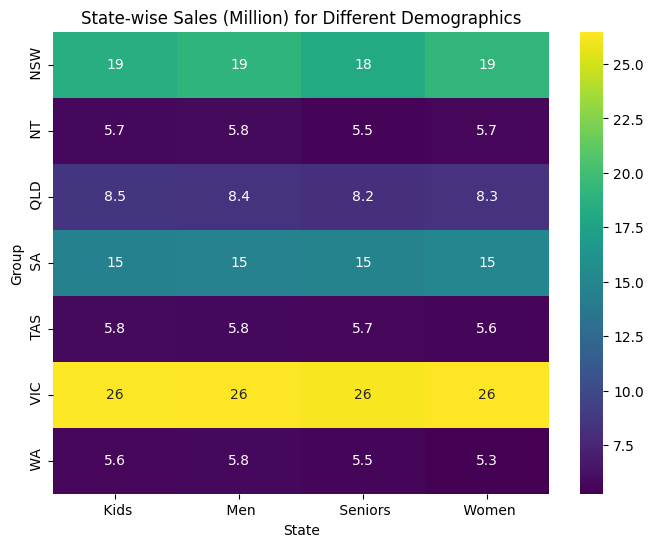

In [68]:
# Plot pivot table as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(state_sales, annot=True, cmap='viridis')
plt.title('State-wise Sales (Million) for Different Demographics')
plt.xlabel('State')
plt.ylabel('Group')
plt.show()

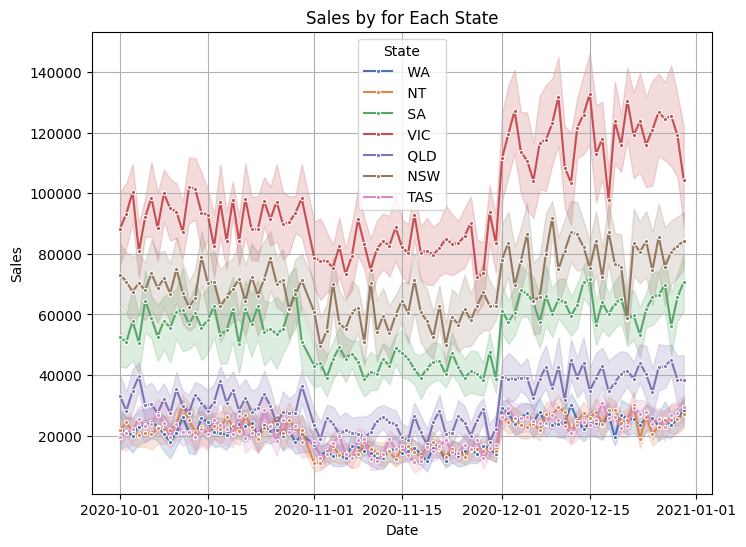

In [69]:
# Plot line plot with different hue for each category
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Date', y='Sales', hue='State', marker='.', palette='deep')
plt.title('Sales by for Each State')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='State')
plt.grid(True)
plt.show()

The month of December seems to have the peak sales period, while november is off-peak for all the states.

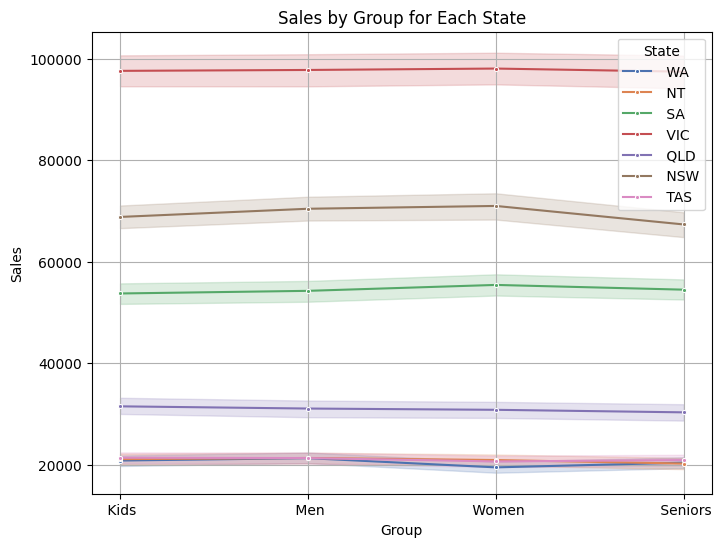

In [70]:
# Plot line plot with different hue for each category
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Group', y='Sales', hue='State', marker='.', palette='deep')
plt.title('Sales by Group for Each State')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.legend(title='State')
plt.grid(True)
plt.show()

### See data distribution

In [71]:
#Check the distribution
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Applying Box-Cox transformation to 'sqft_living' variable
# the _ means we are ignoring that output variable.
df['BoxCox_Sales'], _ = boxcox(df['Sales'])

print(_) # this is the lambda value used of the box cox transformation



0.14855571978955626


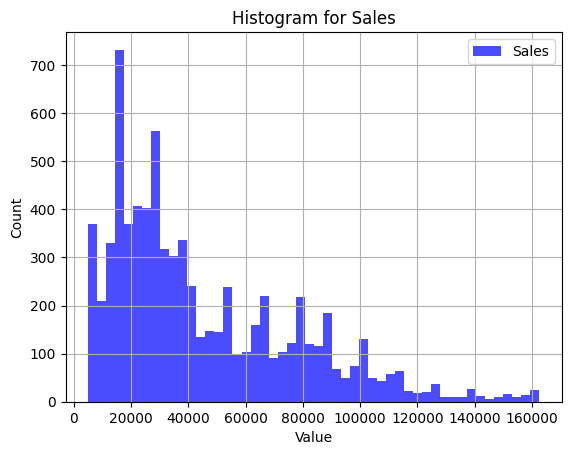

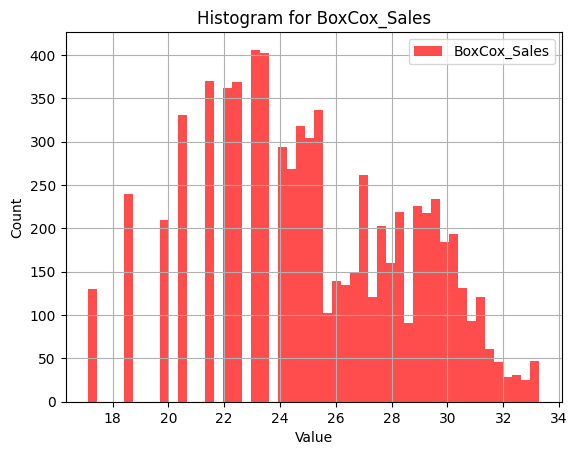

In [72]:
import matplotlib.pyplot as plt


# Plot histogram for column 'A'
plt.hist(df['Sales'], bins=50, color='blue', alpha=0.7, label='Sales')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram for Sales')
plt.legend()
plt.grid(True)
plt.show()

plt.hist(df['BoxCox_Sales'], bins=50, color='red', alpha=0.7, label='BoxCox_Sales')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram for BoxCox_Sales')
plt.legend()
plt.grid(True)
plt.show()

### See data variance by category

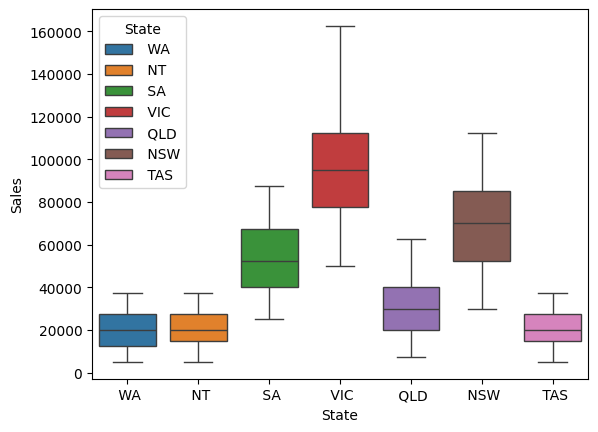

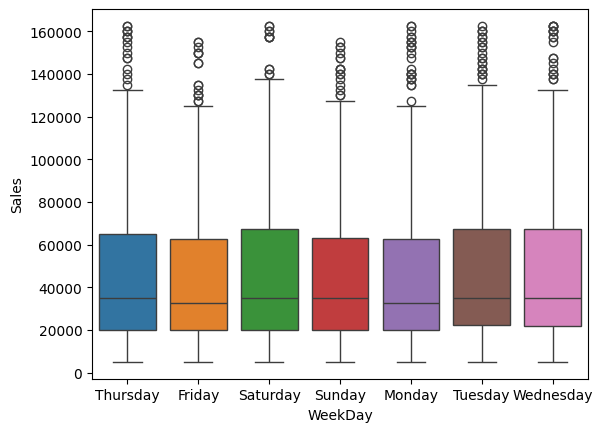

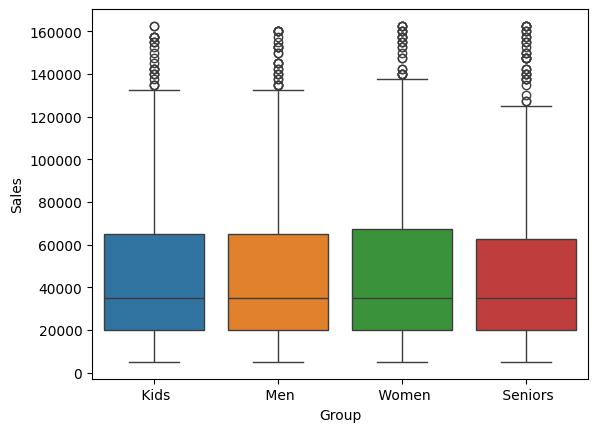

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df, x='State', y='Sales', hue='State', legend=True)
plt.show()
sns.boxplot(df, x='WeekDay', y='Sales', hue='WeekDay')
plt.show()
sns.boxplot(df, x='Group', y='Sales', hue='Group')
plt.show()

In [74]:
# Order dataframe by column
state_week_df['Sales'] = df.groupby('State')['Sales'].mean()

state_week_df = state_week_df.sort_values(by='Sales', ascending=False)
state_week_df

WeekDay,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Sales
State,,,,,,,,
VIC,156,156,144,156,156,156,156,97745.370370
NSW,156,156,144,156,156,156,156,69416.666667
SA,156,156,144,156,156,156,156,54497.685185
QLD,156,156,144,156,156,156,156,30942.129630
TAS,156,156,144,156,156,156,156,21074.074074
NT,156,156,144,156,156,156,156,20907.407407
WA,156,156,144,156,156,156,156,20511.574074


# Conclusion Notes

The top 3 states generating the highest revenues are: VIC, NSW and SA. 

To increase revenue, it is advisable to develop sales programs for WA, NT and TAS states. Specially during the month of November for the Senior Group which show the lowest performance.